# TensorFlow Part 2: The Second One

Now that we've had an initial look at TF, let's set up a simple NN. The original code for this is courtesy of Haihan, and can be found on [GitHub](https://gist.github.com/hhl60492/159a93908319e093424b5adecfc5eb1c).

This will build a 2 hidden layer NN. 

The output is a binary classification output, so the dimension only needs to be one. 

In [230]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer

import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [231]:
# load the sklearn breast cancer dataset
bc = datasets.load_breast_cancer()
X = bc.data[:, :]
Y = bc.target

df = pd.DataFrame(X)
df['target'] = Y
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [288]:
# min max scale and binarize the target labels
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
label = LabelBinarizer()
Y = label.fit_transform(Y)

# train fraction
frac = 0.9

# shuffle dataset
idx = np.random.randint(X.shape[0], size=len(X))
X = X[idx]
Y = Y[idx]

train_stop = int(len(X) * frac)

X_ = X[:train_stop]
Y_ = Y[:train_stop]

X_t = X[train_stop:]
Y_t = Y[train_stop:]

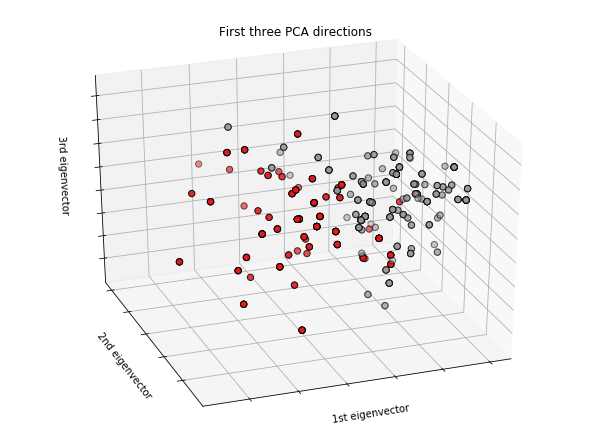

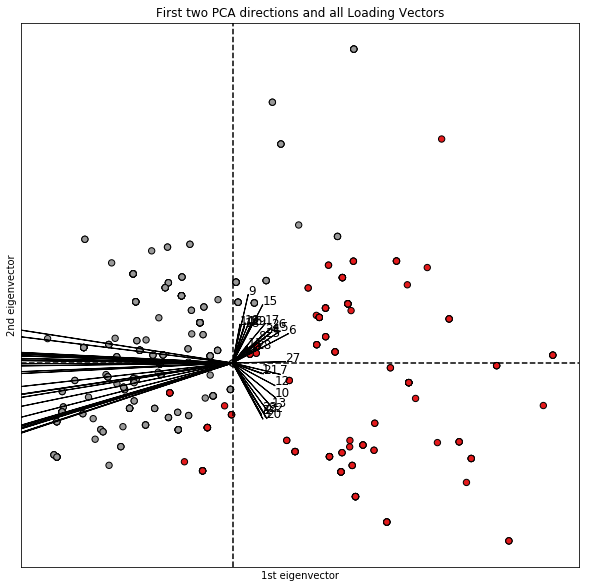

X1


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Transorm X1


array([[1.38263669, 0.39585418, 0.40376679]])

Components 1


array([0.16625519, 0.26752464, 0.0970715 ])

X1 * components.T


array([[0.16625519, 0.26752464, 0.0970715 ]])

In [322]:
# plot the first 3 PCA dimensions of the sampled data
# Note that here we need to get all the components for further use.
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
pca = PCA(n_components=X.shape[1])
X_reduced = pca.fit_transform(X_)

X_1 = np.zeros((1,X.shape[1]))
X_1[0,0] = 1
X_1_red = pca.transform(X_1)

X_test = np.eye(X.shape[1])
X_test_red = pca.transform(X_test)


ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y_.ravel(),
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

# Need these later
components = pca.components_

fig = plt.figure(1, figsize=(10,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y_.ravel(),
           cmap=plt.cm.Set1, edgecolor='k', s=40)
for ii in range(X.shape[1]):
    plt.arrow(0, 0, components[0,ii], components[1,ii],label=str(ii))
    plt.arrow(0, 0, X_test_red[ii,0], X_test_red[ii,1],label=str(ii))
    plt.annotate(str(ii),(components[0,ii], components[1,ii]),fontsize='large')

plt.title("First two PCA directions and all Loading Vectors")
plt.xlabel("1st eigenvector")
plt.xticks([])
plt.ylabel("2nd eigenvector")
plt.yticks([])
plt.axhline(y=0, color='k',linestyle='--')
plt.axvline(x=0, color='k',linestyle='--')
plt.show()

print("X1")
display(X_1)
print("Transorm X1")
display(abs(pca.transform(X_1)))
print("Components 1")
display(abs(pca.components_[:,0]))
print("X1 * components.T")
display(abs(X_1@pca.components_.T))


print()
print()

In [338]:
display(components)

display(X_reduced)

display(X_@components.T)

display(np.mean(np.square(components),axis=1))

array([[ 0.16625519,  0.15978833,  0.17576648,  0.15736004,  0.20678191,
         0.26075928,  0.30695417,  0.2616226 ,  0.142712  ,  0.08581177,
         0.23519939,  0.08137153,  0.23167774,  0.21784035,  0.04113232,
         0.16521623,  0.08481378,  0.17859683,  0.06511848,  0.06810556,
         0.18822529,  0.16763703,  0.19598507,  0.16592724,  0.18048903,
         0.17972352,  0.21109459,  0.28980063,  0.13029131,  0.10060731],
       [-0.26752464, -0.05033276, -0.24461818, -0.24551564,  0.14363738,
         0.15235989,  0.14043407, -0.05453945,  0.11127486,  0.32657775,
        -0.16576001,  0.07580408, -0.1075667 , -0.21317628,  0.18397491,
         0.27760418,  0.18312237,  0.18797956,  0.17295582,  0.19019024,
        -0.26546969, -0.05136757, -0.23385242, -0.23290762,  0.14478584,
         0.1238749 ,  0.16713347,  0.00594772,  0.0667167 ,  0.18255541],
       [-0.0970715 ,  0.40094695, -0.09960776, -0.07633955,  0.00489747,
        -0.12222637, -0.1387974 , -0.08413191, -0

array([[ 1.76973734,  0.03766353,  0.242197  ],
       [-0.54334177, -0.18278357,  0.31362262],
       [ 0.53569034, -0.45128385, -0.17399751],
       ...,
       [ 0.63732331,  0.28494791,  0.50806786],
       [-0.71562605, -0.33150016, -0.17975225],
       [-0.37197822,  0.36280949,  0.09864421]])

array([[ 3.31862922,  0.1659931 ,  0.54889286],
       [ 1.00555011, -0.05445402,  0.62031812],
       [ 2.08458222, -0.32295428,  0.13269824],
       ...,
       [ 2.1862152 ,  0.4132774 ,  0.81476219],
       [ 0.83326583, -0.20317056,  0.12694407],
       [ 1.17691366,  0.49113907,  0.4053402 ]])

array([0.03333333, 0.03333333, 0.03333333])

In [276]:
u, s, vt = np.linalg.svd(X)
v = vt.T
np.eye(X_.shape[1])@(v[:,:3])

display(abs(X@(v[:,:3]))[0])
display(abs(X_reduced)[0])

display(v[0,:3])
display(pca.components_[:,0])

array([4.17683258, 2.1508481 , 0.40138542])

array([3.87376712, 2.17820533, 0.4430311 ])

array([-0.17639945, -0.2672934 ,  0.06638428])

array([ 0.17661475, -0.26710927, -0.06590031])

In [275]:
cov = np.cov(X,rowvar = False)
evals , evecs = np.linalg.eig(cov)

idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

display(abs(X_@(evecs[:,:3]))[0])
display(abs(X_reduced)[0])

display(evecs[0,:3])
display(pca.components_[:3,0])

array([4.17672878, 2.14591888, 0.40523126])

array([3.87376712, 2.17820533, 0.4430311 ])

array([ 0.17661475, -0.26710927, -0.0659003 ])

array([ 0.17661475, -0.26710927, -0.06590031])

In [316]:
# create the TF neural net
# some hyperparams
training_epochs = 200

n_neurons_in_h1 = 10
n_neurons_in_h2 = 10
learning_rate = 0.1

n_features = len(X[0])
labels_dim = 1

# TF NN Starts Here

Variables:

* Our variables are W1, b1, W2 b2, Wo and bo. These correspond to the weights and biases of each layer.

* The size of W1 should be n_features x n_hidden_1, and the size of the bias should be n_hidden_1

* The size of W2 should be n_hidden_1 x n_hidden_2 and the bias should be n_hidden_2

* Finally, the output weights should be n_hidden_2 x labels_dim (one in our case) with a single bias

Loss:

* As this is a binary classification, we may use `sigmoid_cross_entropy_with_logits(y_true, y_pred)`
    * This returns elementwize cross_entropy that is the same size as the logits passed in. 
    * Because of this, we need to also apply `reduce_mean` to the loss to get the average loss over all logits.

Extra things to note:

* Like always, we need to initialize our variables before starting a session. Here we use a `truncated_normal` initalization.
* There seem to be 2 ways to update/evaluate variables. 

    * `sess.run(fetches, feed_dict={required stuff})`
        * this runs/returns results of any tensors/operations in fetches list
    
    * `tensor.eval(session=session,feed_dict=feed_dict)` or `operation.run(session=session,feed_dict=feed_dict)`
        * this returns results for the given tensor
    
    * Only tensors can be evaluated, operations must be run. Operations take in tensors, return new ones.
        * Note that optimizers are operations. 
    
    * [More information here.](https://stackoverflow.com/questions/33610685/in-tensorflow-what-is-the-difference-between-session-run-and-tensor-eval)
        * Main takeaway: 
    >The most important difference is that you can use sess.run() to fetch the values of many tensors in the same step.

Epoch 0199  train loss 0.0471 test loss 0.1211 train acc 0.9980 test acc 0.9649

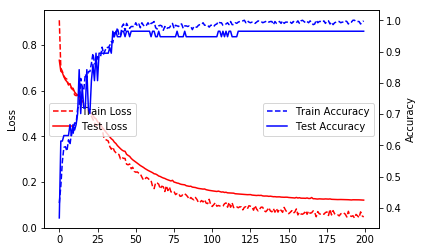

In [339]:
# Use your own graph so it doesn't get messy
graph = tf.Graph()

with graph.as_default():
    # these placeholders serve as our input tensors
    x = tf.placeholder(tf.float32, [None, n_features], name='input')
    y = tf.placeholder(tf.float32, [None, labels_dim], name='labels')

    # TF Variables are our neural net parameter tensors, we initialize them to random (gaussian) values in
    # Layer1. Variables are allowed to be persistent across training epochs and updatable by TF operations
    W1 = tf.Variable(tf.truncated_normal([n_features, n_neurons_in_h1], mean=0, stddev=1 / np.sqrt(n_features)),
                     name='weights1')
    b1 = tf.Variable(tf.truncated_normal([n_neurons_in_h1], mean=0, stddev=1 / np.sqrt(n_features)), name='biases1')

    # note the output tensor of the 1st layer is the activation applied to a
    # linear transform of the layer 1 parameter tensors
    # the matmul operation calculates the dot product between the tensors
    y1 = tf.sigmoid((tf.matmul(x, W1) + b1), name='activationLayer1')

    # network parameters(weights and biases) are set and initialized (Layer2)
    W2 = tf.Variable(tf.random_normal([n_neurons_in_h1, n_neurons_in_h2], mean=0, stddev=1),
                     name='weights2')
    b2 = tf.Variable(tf.random_normal([n_neurons_in_h2], mean=0, stddev=1), name='biases2')
    # activation function(sigmoid)
    y2 = tf.sigmoid((tf.matmul(y1, W2) + b2), name='activationLayer2')

    # output layer weights and biases
    Wo = tf.Variable(tf.random_normal([n_neurons_in_h2, labels_dim], mean=0, stddev=1 ),
                     name='weightsOut')
    bo = tf.Variable(tf.random_normal([labels_dim], mean=0, stddev=1), name='biasesOut')

    # the sigmoid (binary softmax) activation is absorbed into TF's sigmoid_cross_entropy_with_logits loss
    logits = (tf.matmul(y2, Wo) + bo)
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(loss)

    # tap a separate output that applies softmax activation to the output layer
    # for training accuracy readout
    a = tf.nn.sigmoid(logits, name='activationOutputLayer')

    # optimizer used to compute gradient of loss and apply the parameter updates.
    # the train_step object returned is ran by a TF Session to train the net

    # THIS IS AN OPERATOR
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # prediction accuracy
    # compare predicted value from network with the expected value/target

    correct_prediction = tf.equal(tf.round(a), y)
    # accuracy determination
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name="Accuracy")

    #############################################
    # ***NOTE global_variables_initializer() must be called before creating a tf.Session()!***
    init_op = tf.global_variables_initializer()

    # create a session for training and feedforward (prediction). Sessions are TF's way to run
    # feed data to placeholders and variables, obtain outputs and update neural net parameters
    with tf.Session() as sess:
        # ***initialization of all variables... NOTE this must be done before running any further sessions!***
        sess.run(init_op)

        # training loop over the number of epochs
        batch_size = 50
        batches = int(len(X_) / batch_size)
    
        
        train_acc = []
        train_loss = []
        test_acc = []
        test_loss = []
        for epoch in range(training_epochs):
            losses = 0
            accs = 0
            for j in range(batches):
                idx = np.random.randint(X_.shape[0], size=batch_size)
                X_b = X_[idx]
                Y_b = Y_[idx]

                # train the network, note the dictionary of inputs and labels
                sess.run(train_step, feed_dict={x: X_b, y: Y_b})
                # feedforwad the same data and labels, but grab the accuracy and loss as outputs
                acc, l, soft_max_a = sess.run([accuracy, loss, a], feed_dict={x: X_b, y: Y_b})

                losses = losses + np.sum(l)
                accs = accs + np.sum(acc)

            # test on the holdout set and save for plots
            train_acc.append(accs/batches)
            train_loss.append(losses/batches)

            acc_test, l_test, soft_max_a = sess.run([accuracy, loss, a], feed_dict={x: X_t, y: Y_t})
            test_acc.append(acc_test)
            test_loss.append(np.sum(l_test))
            print("\rEpoch %.4d  train loss %.4f test loss %.4f train acc %.4f test acc %.4f" % (epoch,losses/batches,np.sum(l_test),accs/batches,acc_test), end='')

# Plot results
fig,ax = plt.subplots()
ax2 = ax.twinx()  

ax2.plot(train_acc,c='b',linestyle = '--', label='Train Accuracy')
ax.plot(train_loss,c='r', linestyle='--', label='Train Loss')


ax2.plot(test_acc,c='b',label='Test Accuracy')
ax.plot(test_loss,c='r',label='Test Loss')

ax.legend(loc=6)
ax2.legend(loc=7)
plt.xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax.set_ylabel('Loss')

plt.show()
print()
#print(soft_max_a)

# Variations

## Build your own 'custom' loss function.

By delving into TF, we can build our own loss functions. 

Here we will build the exact same loss function (hopefully), and see how it compares to the built in method. 

As a reminder, the binary cross entropy loss is:

$ -\frac{1}{N} \sum_i y_i \log(h_i) + (1-y_i) \log(1-h_i) $

Where $h_i$ is our logistic output (logit), post-sigmoid normalized. 

## Include an MCC readout as well. 

Although Keras lets you define callbacks, it's also really easy to include other metrics directly in TF. Here we read out the MCC metric too.

Reminder that Confusion Matrix is:

TN FP  
FN TP

And MCC is:

$ \frac{TP \times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}} $

## PCA Initialization

Initialize the first layer weights and biases with a random sample of the space spanned by the first 2 principal components.

The first 2 principal components are vectors in n_features dimensional space, defining a 2D plane in this space. We can randomly sample from this by choosing random weights and setting each column of the weight matrix equal to:

$ W1[:,col] = rand_1 * component_1 + rand_2 * component_2 $

Because these component vectors are n_feature dimensional, they will match the dimension of the W1 matrix. 

Sidenote: it seems that when I added this the accuracy went down. Not sure if I did it right.. 

Epoch 0199  **  LOSS train: 0.0502 test: 0.1237  **  ACC train: 0.9980 test: 0.9649  **  MCC train: 0.9959 test: 0.9246


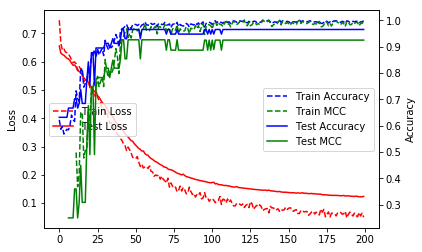

In [340]:
# Use your own graph so it doesn't get messy
graph = tf.Graph()

with graph.as_default():
    # these placeholders serve as our input tensors
    x = tf.placeholder(tf.float32, [None, n_features], name='input')
    y = tf.placeholder(tf.float32, [None, labels_dim], name='labels')
    
    
    ########################################################################
    # UPDATES
    # PCA initialization
    pca_components = tf.placeholder(tf.float32, [n_features, None], name='pca')
    pca_1 = pca_components[:,0:1]
    pca_2 = pca_components[:,1:2]
    
    rand1 = tf.random.uniform([1, n_neurons_in_h1])
    rand2 = tf.random.uniform([1, n_neurons_in_h1])

    W1 = tf.Variable(rand1*pca_1 + rand2*pca_2, name = 'weights1')
    ########################################################################

    # TF Variables are our neural net parameter tensors, we initialize them to random (gaussian) values in
    # Layer1. Variables are allowed to be persistent across training epochs and updatable by TF operations
    #W1 = tf.Variable(tf.truncated_normal([n_features, n_neurons_in_h1], mean=0, stddev=1 / np.sqrt(n_features)),name='weights1')
    b1 = tf.Variable(tf.truncated_normal([n_neurons_in_h1], mean=0, stddev=1 / np.sqrt(n_features)), name='biases1')

    # note the output tensor of the 1st layer is the activation applied to a
    # linear transform of the layer 1 parameter tensors
    # the matmul operation calculates the dot product between the tensors
    y1 = tf.sigmoid((tf.matmul(x, W1) + b1), name='activationLayer1')

    # network parameters(weights and biases) are set and initialized (Layer2)
    W2 = tf.Variable(tf.random_normal([n_neurons_in_h1, n_neurons_in_h2], mean=0, stddev=1),
                     name='weights2')
    b2 = tf.Variable(tf.random_normal([n_neurons_in_h2], mean=0, stddev=1), name='biases2')
    # activation function(sigmoid)
    y2 = tf.sigmoid((tf.matmul(y1, W2) + b2), name='activationLayer2')

    # output layer weights and biases
    Wo = tf.Variable(tf.random_normal([n_neurons_in_h2, labels_dim], mean=0, stddev=1 ),
                     name='weightsOut')
    bo = tf.Variable(tf.random_normal([labels_dim], mean=0, stddev=1), name='biasesOut')

    
    ########################################################################
    # UPDATES
    # Custom cross_entropy_loss
    logits = (tf.matmul(y2, Wo) + bo)
    h = tf.sigmoid(logits, name='activationOutputLayer')
    element_wise_loss = y*tf.log(h)+(1-y)*tf.log(1-h)
    loss = -tf.reduce_mean(element_wise_loss)
    ########################################################################
    

    # tap a separate output that applies softmax activation to the output layer
    # for training accuracy readout
    # a = tf.nn.sigmoid(logits, name='activationOutputLayer')

    # optimizer used to compute gradient of loss and apply the parameter updates.
    # the train_step object returned is ran by a TF Session to train the net

    # THIS IS AN OPERATOR
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # prediction accuracy
    # compare predicted value from network with the expected value/target

    correct_prediction = tf.equal(tf.round(h), y)
    # accuracy determination
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name="Accuracy")
    
    
    
    ########################################################################
    # UPDATES
    # MCC Metric
    prediction = tf.round(h)
    con_mat = tf.confusion_matrix(tf.reshape(y,[-1]),tf.reshape(prediction,[-1]))
    TN = tf.cast(con_mat[0,0],tf.float32)
    FN = tf.cast(con_mat[1,0],tf.float32)
    FP = tf.cast(con_mat[0,1],tf.float32)
    TP = tf.cast(con_mat[1,1],tf.float32)
    mcc = (TP*TN-FP*FN)/tf.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    ########################################################################
    
    

    #############################################
    # ***NOTE global_variables_initializer() must be called before creating a tf.Session()!***
    init_op = tf.global_variables_initializer()

    # create a session for training and feedforward (prediction). Sessions are TF's way to run
    # feed data to placeholders and variables, obtain outputs and update neural net parameters
    
with graph.as_default():
    
    with tf.Session() as sess:
        # ***initialization of all variables... NOTE this must be done before running any further sessions!***
        
        ########################################################################
        # UPDATES
        # Note that the way the initial weights are set up, you need to feed the pca_components in here
        # However, once the W1 is set up, you don't need to feed it in anymore (only used in the initialization)
        sess.run(init_op, feed_dict={pca_components: components.T})
        ########################################################################

        # training loop over the number of epochs
        batch_size = 50
        batches = int(len(X_) / batch_size)
    
        
        train_acc = []
        train_loss = []
        train_mcc = []
        test_acc = []
        test_loss = []
        test_mcc = []
        
        for epoch in range(training_epochs):
            losses = 0
            accs = 0
            mccs = 0
            for j in range(batches):
                idx = np.random.randint(X_.shape[0], size=batch_size)
                X_b = X_[idx]
                Y_b = Y_[idx]

                # train the network, note the dictionary of inputs and labels
                sess.run(train_step, feed_dict={x: X_b, y: Y_b})
                # feedforwad the same data and labels, but grab the accuracy and loss as outputs
                acc, l, mcc_out, soft_max_a = sess.run([accuracy, loss, mcc, h], feed_dict={x: X_b, y: Y_b})

                losses = losses + np.sum(l)
                accs = accs + np.sum(acc)
                mccs = mccs + mcc_out

            # test on the holdout set and save for plots
            train_acc.append(accs/batches)
            train_loss.append(losses/batches)
            train_mcc.append(mccs/batches)

            acc_test, l_test, mcc_test, soft_max_a = sess.run([accuracy, loss, mcc, h], feed_dict={x: X_t, y: Y_t})
            test_acc.append(acc_test)
            test_loss.append(np.sum(l_test))
            test_mcc.append(mcc_test)
            print("\rEpoch %.4d  **  LOSS train: %.4f test: %.4f  **  ACC train: %.4f test: %.4f  **  MCC train: %.4f test: %.4f" \
                  % (epoch,losses/batches,np.sum(l_test),accs/batches,acc_test,mccs/batches,mcc_test), end='')
        print()

# Plot results
fig,ax = plt.subplots()
ax2 = ax.twinx()  

ax2.plot(train_acc,c='b',linestyle = '--', label='Train Accuracy')
ax2.plot(train_mcc,c='g',linestyle = '--', label='Train MCC')
ax.plot(train_loss,c='r', linestyle='--', label='Train Loss')


ax2.plot(test_acc,c='b',label='Test Accuracy')
ax2.plot(test_mcc,c='g',label='Test MCC')
ax.plot(test_loss,c='r',label='Test Loss')

ax.legend(loc=6)
ax2.legend(loc=7)
plt.xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax.set_ylabel('Loss')

plt.show()
print()
#print(soft_max_a)